In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('raw.csv')
df.head()

,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766
1,Bhilwara,Nitrogenous,6.832259,2.243018,22.263480,25.413455,37.644377
2,Jodhpur,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003
3,Jaipur,Clay,8.019189,1.240327,15.839222,17.744206,42.758704
4,Jaipur,Sandy,8.100131,1.768419,27.942867,25.769504,30.651292


In [4]:
print(df.columns)


Index(['District', 'Soil Type', 'pH Level', 'Organic Matter (%)',
       'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)',
       'Potassium Content (kg/ha)'],
      dtype='object')


In [5]:
from sklearn.cluster import KMeans

# Assuming X is your numerical data (e.g., df[feature_columns])
X = df[['pH Level', 'Organic Matter (%)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)']]  # change based on your dataset

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


In [6]:
soil_by_cluster = df.groupby(['Cluster', 'Soil Type']).size().unstack().fillna(0)


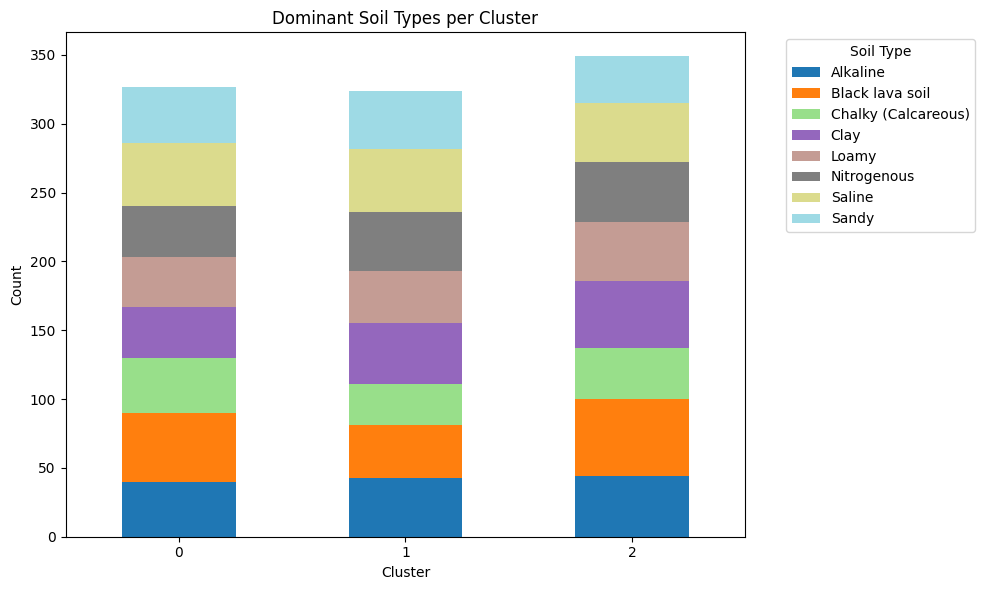

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit KMeans (if not already done)
X = df[['pH Level', 'Organic Matter (%)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)']]
df['Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(X)

# Group and plot
soil_by_cluster = df.groupby(['Cluster', 'Soil Type']).size().unstack().fillna(0)
soil_by_cluster.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Dominant Soil Types per Cluster")
plt.ylabel("Count")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(title="Soil Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split



In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape



((261, 4), (66, 4))

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2586
- Mean Absolute Error: 4.2188
- R2 Score: 0.0347
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5496
- Mean Absolute Error: 4.2685
- R2 Score: -0.0240


Lasso
Model performance for Training set
- Root Mean Squared Error: 5.3344
- Mean Absolute Error: 4.2497
- R2 Score: 0.0067
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4492
- Mean Absolute Error: 4.2509
- R2 Score: 0.0128


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2587
- Mean Absolute Error: 4.2181
- R2 Score: 0.0347
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5469
- Mean Absolute Error: 4.2660
- R2 Score: -0.0230


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.6859
- Mean Absolute Error: 3.6925
- R2 Score: 0.2336
---------------------

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,0.012761
8,AdaBoost Regressor,-0.001463
2,Ridge,-0.022972
0,Linear Regression,-0.023956
3,K-Neighbors Regressor,-0.071510
5,Random Forest Regressor,-0.133652
6,XGBRegressor,-0.308584
7,CatBoosting Regressor,-0.310506
4,Decision Tree,-0.802193


In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -2.40


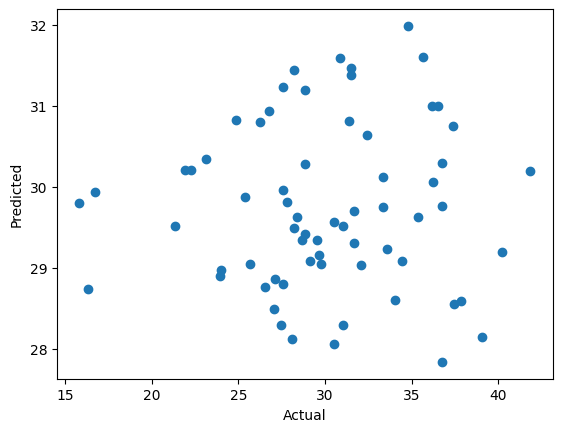

In [27]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

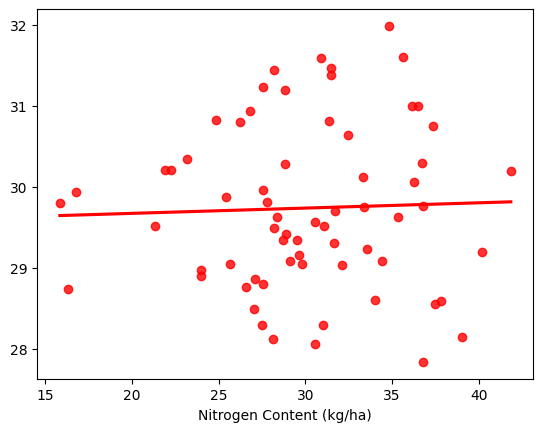

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [29]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
683,37.379396,30.754059,6.625337
321,32.446273,30.634654,1.811619
752,31.486136,31.461855,0.024282
31,30.547042,29.559073,0.987969
271,28.379659,29.631006,-1.251346
...,...,...,...
747,31.659592,29.301183,2.358409
179,33.552746,29.235990,4.316755
352,33.359723,29.744815,3.614908
791,39.030446,28.148148,10.882298


In [32]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()  # already done ✅
print(df.columns.tolist())  # recheck this output
for col in df.columns:
    if 'yield' in col.lower():
        print(f"Maybe: {col}")
print("Columns:", df.columns.tolist())


['District', 'Soil Type', 'pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)', 'Cluster']
['District', 'Soil Type', 'pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)', 'Cluster']
Columns: ['District', 'Soil Type', 'pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)', 'Cluster']


In [35]:
pd.read_csv("../../artifacts/train.csv").columns




Index(['District', 'Soil Type', 'pH Level', 'Organic Matter (%)',
       'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)',
       'Potassium Content (kg/ha)'],
      dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Identify categorical and numerical columns
categorical_cols = ["District", "Soil Type"]
numerical_cols = ["pH Level", "Organic Matter (%)", "Phosphorus Content (kg/ha)"]

# Step 2: Separate target column
target = "Nitrogen Content (kg/ha)"
X = df.drop(columns=[target])
y = df[target]

# Step 3: Define preprocessing for each type of column
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Step 4: Fit and transform
X_processed = preprocessor.fit_transform(X)



In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("../../artifacts/train.csv")

# Define target column
target = "Nitrogen Content (kg/ha)"

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
categorical_cols = ["District", "Soil Type"]
numerical_cols = ["pH Level", "Organic Matter (%)", "Phosphorus Content (kg/ha)"]

# Define a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Apply preprocessing
X_scaled = preprocessor.fit_transform(X)

# Optional: print shape to verify
print("Scaled features shape:", X_scaled.shape)


Scaled features shape: (800, 21)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load dataset
df = pd.read_csv("c")

# Define target column
target = "Nitrogen Content (kg/ha)"

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
categorical_cols = ["District", "Soil Type"]
numerical_cols = ["pH Level", "Organic Matter (%)", "Phosphorus Content (kg/ha)"]

# Preprocessing: Scaling + One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Apply preprocessing
X_scaled = preprocessor.fit_transform(X)

# Apply PCA (reduce to 5 components)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Define base learners
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42))
]

# Meta learner
meta_learner = LinearRegression()

# Create and train stacking model on PCA-reduced data
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)
stacking_model.fit(X_pca, y)

# Optional: print success message
print("✅ Stacking model trained successfully on PCA-reduced data.")


✅ Stacking model trained successfully on PCA-reduced data.


In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("../../artifacts/train.csv")

# Define target column
target = "Nitrogen Content (kg/ha)"

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
categorical_cols = ["District", "Soil Type"]
numerical_cols = ["pH Level", "Organic Matter (%)", "Phosphorus Content (kg/ha)"]

# Define a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Apply preprocessing
X_scaled = preprocessor.fit_transform(X)

# Optional: print shape to verify
print("Scaled features shape:", X_scaled.shape)


Scaled features shape: (800, 21)


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("../../artifacts/train.csv")

# Define target column
target = "Nitrogen Content (kg/ha)"
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
categorical_cols = ["District", "Soil Type"]
numerical_cols = ["pH Level", "Organic Matter (%)", "Phosphorus Content (kg/ha)"]

# Preprocessing: Scaling + One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Apply preprocessing
X_scaled = preprocessor.fit_transform(X)

# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define base learners and meta learner
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42))
]
meta_learner = LinearRegression()

# Stacking Regressor
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

# Cross-validation
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='r2')
print("✅ Cross-Validation R² Scores:", np.round(cv_scores, 4))
print("🔍 Mean CV R² Score:", round(np.mean(cv_scores), 4))

# Train the model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred = stacking_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluation on Test Set:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


✅ Cross-Validation R² Scores: [-0.0195 -0.0025 -0.0036 -0.0236 -0.0201]
🔍 Mean CV R² Score: -0.0138

📊 Evaluation on Test Set:
MAE  : 4.0409
RMSE : 5.2182
R²   : -0.0062


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your data
df = pd.read_csv("../../artifacts/train.csv")

# Define target
target = "Nitrogen Content (kg/ha)"
X = df.drop(columns=[target])
y = df[target]

# Identify column types
categorical_cols = ["District", "Soil Type"]
numerical_cols = ["pH Level", "Organic Matter (%)", "Phosphorus Content (kg/ha)"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Lasso Regression pipeline
lasso_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Lasso())
])

# Define alpha values to test
param_grid = {
    "model__alpha": np.logspace(-4, 1, 10)
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_
print("🔧 Best Alpha:", grid_search.best_params_['model__alpha'])

# Evaluate on train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluation Metrics for Optimized Lasso:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


🔧 Best Alpha: 0.21544346900318845

📊 Evaluation Metrics for Optimized Lasso:
MAE  : 4.0363
RMSE : 5.2261
R²   : -0.0092


In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Updated pipeline with PolynomialFeatures
from sklearn.linear_model import Lasso

poly_lasso_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", Lasso(max_iter=10000))
])

# Grid search for best alpha
param_grid_poly = {
    "model__alpha": np.logspace(-4, 1, 10)
}

grid_poly = GridSearchCV(poly_lasso_pipeline, param_grid_poly, cv=5, scoring='r2')
grid_poly.fit(X, y)

# Results
print("🔧 Best Alpha (PolyLasso):", grid_poly.best_params_['model__alpha'])
y_pred_poly = grid_poly.predict(X_test)

print("\n📊 Poly-Lasso Metrics:")
print("R²  :", r2_score(y_test, y_pred_poly))
print("MAE :", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


🔧 Best Alpha (PolyLasso): 0.7742636826811278

📊 Poly-Lasso Metrics:
R²  : -0.004041026781570922
MAE : 4.02672867599153
RMSE: 5.212720081193762


In [51]:
from sklearn.linear_model import ElasticNet

elastic_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", ElasticNet(max_iter=10000))
])

# Grid for alpha and l1_ratio (balance between Lasso and Ridge)
param_grid_en = {
    "model__alpha": np.logspace(-4, 1, 10),
    "model__l1_ratio": np.linspace(0.1, 0.9, 9)
}

grid_elastic = GridSearchCV(elastic_pipeline, param_grid_en, cv=5, scoring='r2')
grid_elastic.fit(X, y)

print("🔧 Best Params (ElasticNet):", grid_elastic.best_params_)
y_pred_en = grid_elastic.predict(X_test)

print("\n📊 ElasticNet Metrics:")
print("R²  :", r2_score(y_test, y_pred_en))
print("MAE :", mean_absolute_error(y_test, y_pred_en))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_en)))


🔧 Best Params (ElasticNet): {'model__alpha': np.float64(0.7742636826811278), 'model__l1_ratio': np.float64(0.1)}

📊 ElasticNet Metrics:
R²  : -0.005160916990774034
MAE : 4.0272458269231945
RMSE: 5.215626360480786
